Wczytano dane: (110, 3)
Współczynniki: a=-962184798432239.8750, b=481092399216125.3750


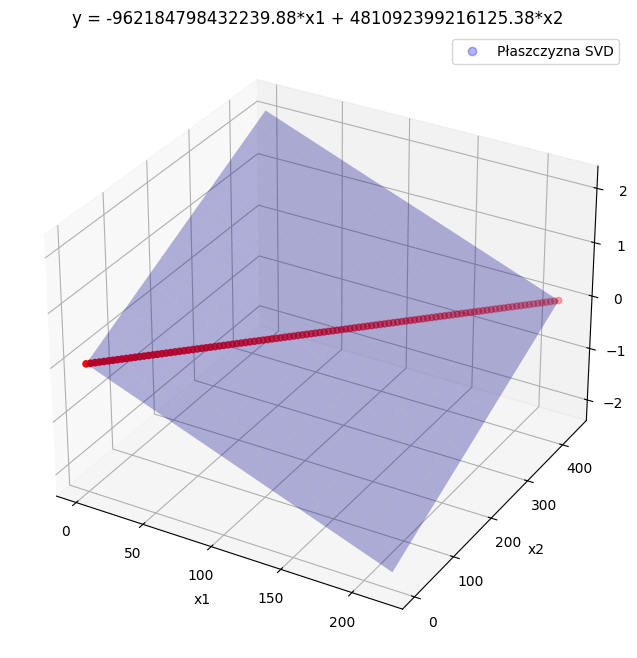

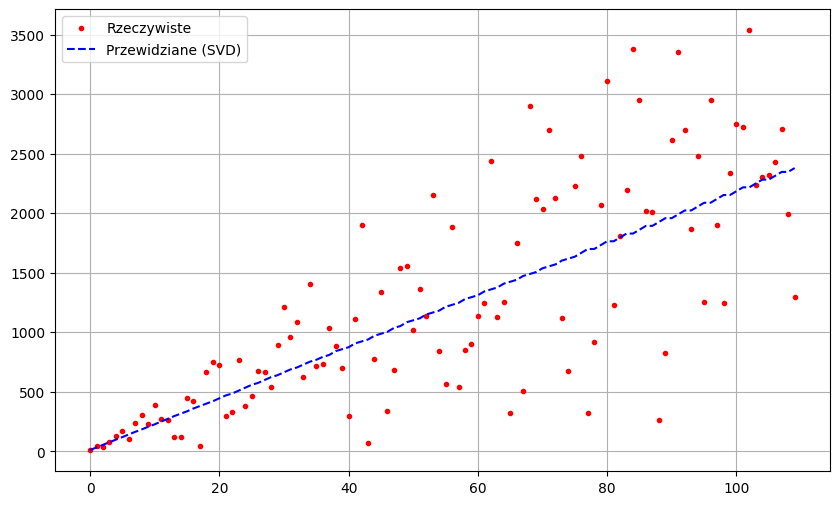

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- WCZYTANIE DANYCH ---
filename = 'war8.csv'

try:
    # Obsługa formatu CSV (separator ; lub ,)
    df = pd.read_csv(filename, sep=';', decimal=',')
    if df.shape[1] < 3:
         df = pd.read_csv(filename, sep=',')

    # Konwersja tekstowych liczb na float
    for col in df.columns:
        if df[col].dtype == object:
            try:
                df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
            except ValueError:
                pass

    print(f"Wczytano dane: {df.shape}")

    x1 = df.iloc[:, 0].values.astype(float)
    x2 = df.iloc[:, 1].values.astype(float)
    y = df.iloc[:, 2].values.astype(float)

except FileNotFoundError:
    print(f"Błąd: Brak pliku {filename}")
    raise

# --- OBLICZENIA SVD ---
A = np.column_stack((x1, x2))

# Rozkład SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# Obliczenie pseudoodwrotności (A+)
S_inv = np.diag(1 / s)
V = Vt.T
A_plus = V @ S_inv @ U.T

# Współczynniki regresji
coeffs = A_plus @ y
a_calc, b_calc = coeffs

print(f"Współczynniki: a={a_calc:.4f}, b={b_calc:.4f}")

# --- WIZUALIZACJA 3D ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Punkty pomiarowe
ax.scatter(x1, x2, y, c='r', marker='o', label='Dane')

# Siatka płaszczyzny regresji
x1_surf = np.linspace(min(x1), max(x1), 20)
x2_surf = np.linspace(min(x2), max(x2), 20)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)
y_surf = a_calc * x1_surf + b_calc * x2_surf

ax.plot_surface(x1_surf, x2_surf, y_surf, color='blue', alpha=0.3)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f'y = {a_calc:.2f}*x1 + {b_calc:.2f}*x2')

# Legenda
fake2Dline = plt.Line2D([0],[0], linestyle="none", c='b', marker='o', alpha=0.3)
ax.legend([fake2Dline], ['Płaszczyzna SVD'])

plt.show()

# --- PORÓWNANIE WARTOŚCI ---
y_pred = A @ coeffs
plt.figure(figsize=(10, 6))
plt.plot(y, 'r.', label='Rzeczywiste')
plt.plot(y_pred, 'b--', label='Przewidziane (SVD)')
plt.legend()
plt.grid(True)
plt.show()